# Word Cloud - 한글

In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [1]:
!pip install konlpy > /dev/null

In [2]:
from google.colab import files
uploaded = files.upload()
textfile = list(uploaded.keys())[0]

Saving gift.txt to gift.txt


In [3]:
uploaded = files.upload()
maskfile = list(uploaded.keys())[0]

Saving heart.jpg to heart.jpg


## 한글 텍스트 전처리

In [4]:
with open(textfile) as fp:
    text = fp.read()

In [5]:
from konlpy.tag import Okt
okt = Okt()

In [6]:
tokens = okt.nouns(text)
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [9]:
# 영문자, 숫자 제거
import re
new_tokens = []
for token in tokens:
    item = re.sub('[A-Za-z0-9]', '', token)
    if item:
        new_tokens.append(item)

In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumBarunGothic')

In [11]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

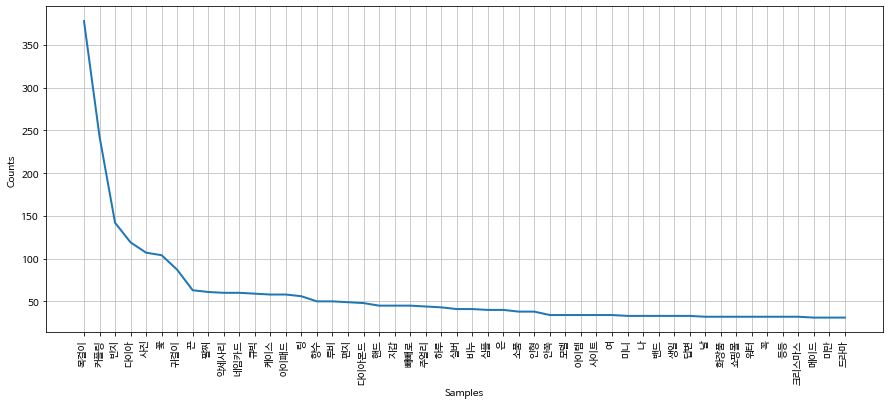

In [25]:
gift = nltk.Text(new_tokens, name='여친선물')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [24]:
stoptext = """선물 추천 것 하트 가격 수 커플 가능 제품 저 제 생각 여자 분 고급 거 사람 중 처 하투 샘플 밍티풀 주소
    정말 후기 티니 개 감동 여자친구 사용 요 더 사용 구매 판매 때 참고 머리 하나 해 한번 몇개 투척 클래식 쇼핑
    제작 네이버 여친 사랑 용 준 디자인 배송 세대 인기 상품 직접 브랜드 선택 곳 곤 모양 마감 버핏 빅사 링크 이니셜
    등 요즘 곱창 인테리어 오늘 가지 남녀 그냥 이벤트 위 페이 마음 부담 연극 향 로티 신지 남자 이즈 하프 공용
    협찬 전 의미 변경 도움 색상 아래 포장 조금 하투 정도 처리 보시 독서 꽃말 여성 가장 때문 정보 스타일 기념일
    헤어 질문 친구 스토어 아주 할인 미쁜 스 이면 남 지금 고민 센스 체크 라인 로파 웨어"""
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['반지', '목걸이', '가디건', '모자', '커플룩', '니트', '가디건', '가디건', '커플룩', '가디건']

## Word Cloud 그리기

In [26]:
from wordcloud import WordCloud
from PIL import Image

In [29]:
data = gift.vocab().most_common(300)
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(
    font_path=path, relative_scaling=0.2, background_color='white'
).generate_from_frequencies(dict(data))

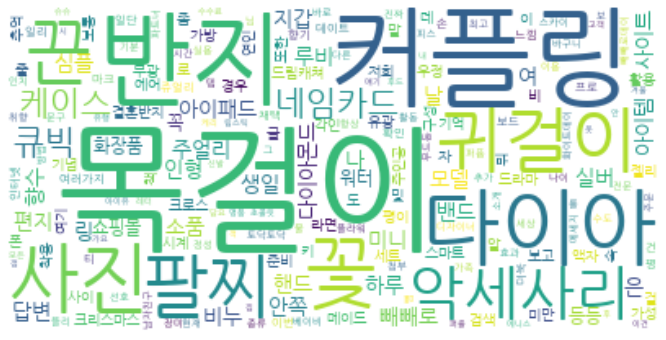

In [30]:
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 하트 그림 위에 표시하기

In [31]:
mask = np.array(Image.open(maskfile))
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [32]:
wc = WordCloud(
    font_path=path, relative_scaling=0.2,
    background_color='white', mask=mask,
    min_font_size=1, max_font_size=120
).generate_from_frequencies(dict(data))

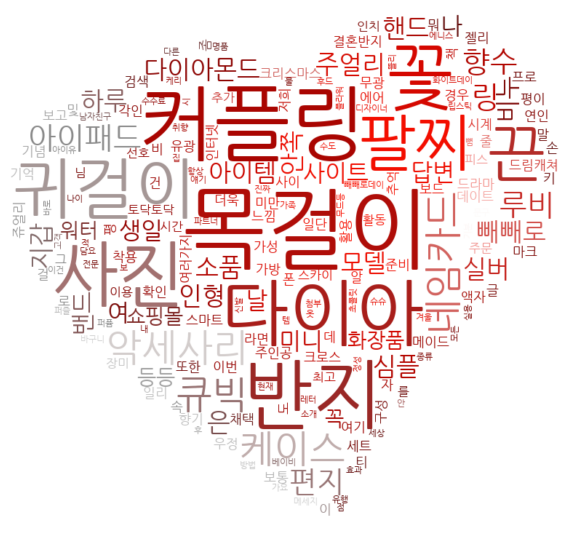

In [33]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors),
           interpolation='bilinear')
plt.axis('off')
plt.show()